# Interpolation

- Linear
- Polynomial
- Cubic Splines

## Linear Interpolation

Suppose we have two points: $(x_1, y_1)$ and $(x_2, y_2)$.

We can force a line between them satisfying the equation:

$$
k = \frac{{y_2 - y_1}}{{x_2 - x_1}} = \frac{{y - y_1}}{{x - x_1}} \quad \text{for} \quad x_1 \leq x \leq x_2
$$

The interpolation equation then becomes:

$$
y = k(x - x_1) + y_1
$$

which can be rewritten as:

$$
y = \frac{{y_2 - y_1}}{{x_2 - x_1}} \cdot (x - x_1) + y_1
$$

Linear interpolation is useful for quick value approximations, but it fails if derivatives are needed.

In [138]:
#pythonic code
def binary_search(arr:list, x:float): #helper function needed 
    low = 0
    high = len(arr) 
    while low<high:
        mid=(low+high)//2
        if arr[mid]>x: high=mid
        else: low=mid+1
    return low

def linear_interpolation(x:float,xi:list, yi:list) -> float:
    
    if x <= xi[0]: 
        return yi[0]
    elif x >= xi[-1]: 
        return yi[-1]
    upper=binary_search(xi,x)
    return (yi[upper]-yi[upper-1])/(xi[upper]-xi[upper-1]) *(x-xi[upper-1]) +yi[upper-1]

## Polynomial Interpolation

Suppose we have \(N\) points:
$$
(x_1, y_1), \quad (x_2, y_2), \quad \dots, \quad (x_N, y_N)
$$

Through these points, we can construct a polynomial of order $(N-1)$:

$$
p^{N-1}(x) = a_0 + a_1 x + \dots + a_{N-1} x^{N-1}
$$

One common way of finding such a polynomial is with the Lagrange formula:

$$
p^{N-1}(x) = \sum_{i=1}^{N} y_i \prod_{\substack{j=1 \\ j \neq i}}^{N} \frac{x - x_j}{x_i - x_j}
$$


In [19]:
#pythonic code
def lagrange_interpolation(x:float,xi:list, yi:list) -> float:
    y=0
    for i in range(len(xi)):
        y_temp=yi[i]
        for j in range(len(xi)):
            if i != j:
                y_temp*=(x-xi[j])/(xi[i]-xi[j])
        y+=y_temp
    return y
    

### Example 1

Consider the function:

$$
y = \frac{1}{1 + x^2}
$$

We will approximate this function on the interval $[-5, 5]$ using 11 points.

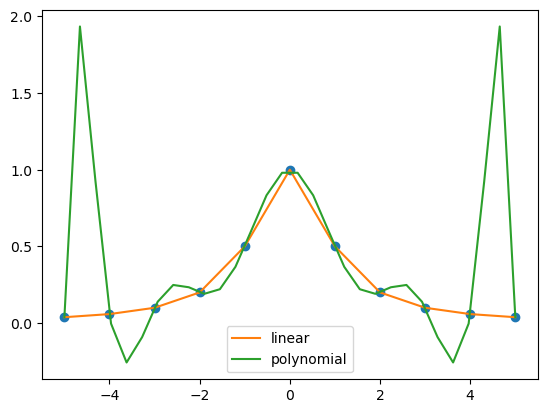

In [166]:
x=[-5+i for i in range(11)]
y=[1/(1+i*i) for i in x]

import matplotlib.pyplot as plt
import numpy as np

x_plot_linear=np.linspace(-5,5,11)
y_plot_linear=np.array([linear_interpolation(i,x,y) for i in x_plot_linear])

x_plot_lagrange=np.linspace(-5,5,30)
y_plot_lagrange=lagrange_interpolation(x_plot,x,y)

plt.plot(x,y,"o")
plt.plot(x_plot_linear,y_plot_linear, label="linear")
plt.plot(x_plot_lagrange,y_plot_lagrange, label="polynomial")
plt.legend();

## Natural Cubic Spline

Suppose we have $N$ points $(x_1, y_1), (x_2, y_2), \dots, (x_N, y_N)$. We define $F(x)$ as a piecewise function:

$$
F(x) = 
\begin{cases} 
f_1(x) & \text{for } x_1 \leq x \leq x_2 \\
f_2(x) & \text{for } x_2 \leq x \leq x_3 \\
\vdots & \\
f_{N-1}(x) & \text{for } x_{N-1} \leq x \leq x_N
\end{cases}
$$

Where each $f_i(x)$ is a cubic polynomial:

$$
f_i(x) = a_i(x - x_i)^3 + b_i(x - x_i)^2 + c_i(x - x_i) + d_i
$$

### Conditions

We impose the following conditions on $F(x)$ for a natural cubic spline:

1. $F(x)$ passes through all the points $(x_i, y_i)$ for $i = 1, \dots, N$:

$$
F(x_i) = y_i \quad \text{for} \quad i = 1, 2, \dots, N
$$

2. $F(x)$ is continuous on the interval $[x_1, x_N]$:

$$
F(x) \text{ is continuous at } x_i \quad \text{for} \quad i = 1, 2, \dots, N-1
$$

3. The first derivative $F'(x)$ is continuous on $[x_1, x_N]$:

$$
F'(x) \text{ is continuous at } x_i \quad \text{for} \quad i = 1, 2, \dots, N-1
$$

4. The second derivative $F''(x)$ is continuous on $[x_1, x_N]$:

$$
F''(x) \text{ is continuous at } x_i \quad \text{for} \quad i = 1, 2, \dots, N-1
$$



<img src="cubic_splin.png" alt="Cubic spline" width="500" height="250"/>

## Natural Cubic Spline Conditions from the Graph

We can define the conditions for the cubic spline interpolation based on the graph and the properties of the spline:

##### 1) $f_i(x_i) = y_i $

For each segment $f_i(x)$, the polynomial must pass through the point $(x_i, y_i)$. Therefore, we have:

$$
f_i(x_i) = a_i (x_i - x_i)^3 + b_i (x_i - x_i)^2 + c_i (x_i - x_i) + d_i
$$

This simplifies to:

$$
f_i(x_i) = d_i
$$

##### 2) $ f_{i-1}(x_i) = f_i(x_i) $

The function is continuous, meaning the value of $f_{i-1}(x)$ at $x_i$ is equal to the value of $f_i(x)$ at $x_i$. This gives us the following equation:

$$
f_{i-1}(x_i) = f_i(x_i)
$$

$$
a_{i-1}(x_i - x_{i-1})^3 + b_{i-1}(x_i - x_{i-1})^2 + c_{i-1}(x_i - x_{i-1}) + d_{i-1} = a_i (x_i - x_i)^3 + b_i (x_i - x_i)^2 + c_i (x_i - x_i) + d_i
$$

$$
a_{i-1}(x_i - x_{i-1})^3 + b_{i-1}(x_i - x_{i-1})^2 + c_{i-1}(x_i - x_{i-1}) + d_{i-1} = d_i
$$

Now, assume equal spacing between the points, denoted by $h$. The spacing between any two consecutive points is given by:

$$
h = x_{i} - x_{i-1}
$$

$$
a_{i-1} h^3 + b_{i-1} h^2 + c_{i-1} h + d_{i-1} = d_i
$$

##### 3) $ f'_i(x_i) = f'_{i-1}(x_i) $

The first derivative must also be continuous. The slopes at $x_i$ of $f_i(x)$ and $f_{i-1}(x)$ must be equal:

$$
f'_i(x_i) = f'_{i-1}(x_i)
$$

$$
f'_i(x) = 3a_i (x - x_i)^2 + 2b_i (x - x_i) + c_i
$$

At $ x = x_i $, we get:

$$
f'_i(x_i) = c_i
$$

Hence,
$$
c_i = 3a_{i-1} (x_i - x_{i-1})^2 + 2b_{i-1} (x_i - x_{i-1}) + c_{i-1}
$$

Using equal spacing,
$$
c_i = 3a_{i-1} h^2 + 2b_{i-1} h + c_{i-1}
$$

##### 4) $ f''_i(x_i) = f''_{i-1}(x_i) $

The second derivative must be continuous as well. The curvature of the spline at $x_i$ must be the same for both $f_i(x)$ and $f_{i-1}(x)$:

$$
f''_i(x_i) = f''_{i-1}(x_i)
$$

$$
f''_i(x) = 6a_i (x - x_i) + 2b_i
$$

At $x = x_i $, we get:

$$
f''_i(x_i) = 2b_i
$$

$$
f''_{i-1}(x) = 6a_{i-1} (x - x_{i-1}) + 2b_{i-1}
$$

$$
2b_i =  6a_{i-1} (x - x_{i-1}) + 2b_{i-1}
$$

Using equal spacing again,
$$
2b_i =  6a_{i-1} h + 2b_{i-1}
$$



We have collected four equations:
1. $d_i=y_i$
2. $a_{i} h^3 + b_{i} h^2 + c_{i} h + d_{i} = d_{i+1} $
3. $c_{i+1} = 3a_{i} h^2 + 2b_{i} h + c_{i}$
4. $2b_{i+1} = 6a_{i} h + 2b_{i}$

Now we introduce $M_i = 2b_i$ the value of the second derivative at point $x_i$ (Note: we do not know its value).

This simplifies the second derivative equation, and allows us to manipulate the system more easily.


From equation (4), express $ a_i $:

$$
2b_{i+1} = 6a_{i} h + 2b_{i}
$$

Rearrange to solve for $ a_i $:

$$
a_i = \frac{2b_{i+1}-2b_{i}}{6h} = \frac{M_{i+1} - M_i}{6h}
$$

From equation (2), express $ c_i $:
$$
a_{i} h^3 + b_{i} h^2 + c_{i} h + d_{i} = d_{i+1}
$$

$$
\left( \frac{M_{i+1} - M_i}{6h} \right) h^3 + \frac{M_{i}}{2} h^2 + c_{i} h + y_i = y_{i+1}
$$

It is easy to express $c_i$:
$$
c_i = \frac{y_{i+1} - y_i}{h} - \frac{M_{i+1} + 2M_i}{6}h
$$

We have now expressed all coefficients in terms of $M$:
- $a_i = \frac{M_{i+1} - M_i}{6h} $
- $b_i = \frac{M_i}{2} $
- $c_i = \frac{y_{i+1} - y_i}{h} - \frac{M_{i+1} + 2M_i}{6}h $
- $d_i = y_i $

Substituting these into the equation $ c_{i+1} = 3a_i h^2 + 2b_i h + c_i $, we can solve for $M$:
$$
3\left(\frac{M_{i+1} - M_i}{6h}\right) h^2 + 2\left(\frac{M_i}{2}\right) h + \left(\frac{y_{i+1} - y_i}{h} - \frac{M_{i+1} + 2M_i}{6}h\right) = \left(\frac{y_{i+2} - y_{i+1}}{h} - \frac{M_{i+2} + 2M_{i+1}}{6}h\right)
$$


$$
\frac{h}{6} \left(M_{i+2} + 4M_{i+1} + M_i\right) = \frac{y_{i+2} - 2y_{i+1} + y_i}{h}
$$

<br/><br/>

$$
M_{i+2} + 4M_{i+1} + M_i = \frac{6}{h^2} (y_{i+2} - 2y_{i+1} + y_i), \quad i = 1, 2, \ldots, N-2
$$


We have N variables, but only N-2 equations. Here we invoke natural spline formalism: $M_1 = M_N = 0$

From here we are now left with a simple sparse matrix equation of the form $A M = b$:

$$
\begin{pmatrix}
4 & 1 & 0 & 0 & \cdots & 0 & 0 \\
1 & 4 & 1 & 0 & \cdots & 0 & 0 \\
0 & 1 & 4 & 1 & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & 1 & 4 & 1 \\
0 & 0 & 0 & \cdots & 0 & 1 & 4
\end{pmatrix}
\begin{pmatrix}
M_2 \\
M_3 \\
\vdots \\
M_{N-1}
\end{pmatrix}
=
\frac{6}{h^2} 
\begin{pmatrix}
y_3 - 2y_2 + y_1 \\
y_4 - 2y_3 + y_2 \\
\vdots \\
y_{N-1} - 2y_{N-2} + y_{N-3} \\
y_N - 2y_{N-1} + y_{N-2}
\end{pmatrix}
$$

In [402]:
#pythonic code
#i will make my own solver for educational reasons
import numpy as np

class customCSR():
    def __init__(self,n: int):
        self.value=[]
        self.col=[]
        self.row=[]
        self.A_matrix(n)

    def A_matrix(self, n: int):
        self.row = [0]
        for i in range(n):
            self.value.append(4)
            self.col.append(i)
            
            #sub, diagonal
            if i<n-1:
                self.value.append(1)
                self.col.append(i+1)
                
            #sup diagonal
            if i>0:
                self.value.append(1)
                self.col.append(i-1)
            
            self.row.append(len(self.value))

    def matvec(self, vector):
        result = np.zeros_like(vector)
        for i in range(len(self.row) - 1):
            row_start = self.row[i]
            row_end = self.row[i + 1]
            for j in range(row_start, row_end):
                result[i] += self.value[j] * vector[self.col[j]]
        return result

def GC_solver(A: customCSR, b: np.array, tol: float = 1e-6, max_iter: int = 1000) -> np.array:
    n = len(b)
    M=np.zeros(n)
    r = b - A.matvec(M)
    p = r.copy()
    rs_old = r
    for iter in range(max_iter):

        Ap = A.matvec(p)
        
        alpha = np.dot(rs_old,rs_old) / np.dot(p, Ap)
        
        M = M + alpha * p
        
        r = r - alpha * Ap
        
        rs_new = r
        

        if np.linalg.norm(rs_new) < tol:
            break
        
        p = r + np.dot(rs_new,rs_new) / np.dot(rs_old,rs_old) * p
        
        rs_old = rs_new
    
    return M

def make_b_vector(h:float,y:list):
    b=np.zeros(len(y)-2)
    for i in range(len(y)-2):
        b[i]=y[i+2]-2*y[i+1]+y[i]
    return 6*b/(h*h)
    
def binary_search(arr:list, x:float): #helper function needed 
    low = 0
    high = len(arr) 
    while low<high:
        mid=(low+high)//2
        if arr[mid]>x: high=mid
        else: low=mid+1
    if low > 0 and arr[low - 1] == x:
        return low - 1
    return low

class cubic_spline():
    def __init__(self, x_data,y_data):
        self.x_data=x_data
        self.d=y_data
        self.h=x_data[1]-x_data[0]
        self.b=[]
        self.a=[]
        self.c=[]
        self.interpolate()

    def interpolate(self):
        b=make_b_vector(self.h,self.d)
        A=customCSR(len(b))
        M=GC_solver(A,b)
        M=np.concatenate(([0],M,[0]))
        #self.M=M

        for i in range(len(M)-1):
            self.b.append(M[i]/2)
            self.a.append((M[i+1]-M[i])/(6*self.h))
            self.c.append( (self.d[i+1]-self.d[i])/self.h - self.h/6 *(M[i+1]+2*M[i]))
        
    def __call__(self, x:float):
        upper_x=binary_search(self.x_data,x)
        lower=upper_x-1
        if lower<0: lower=0
        return self.a[lower]*(x-self.x_data[lower])**3 + self.b[lower]*(x-self.x_data[lower])**2 + self.c[lower]*(x-self.x_data[lower])+self.d[lower]

### Example

Find the cubic spline between points:<p></p>
$(0,0)$<p></p>
$(1,0.5)$<p></p>
$(2,2)$<p></p>
$(3,1.5)$

In [407]:
#Example
x=[0,1,2,3]
y=[0,0.5,2,1.5]
cs=cubic_spline(x,y)

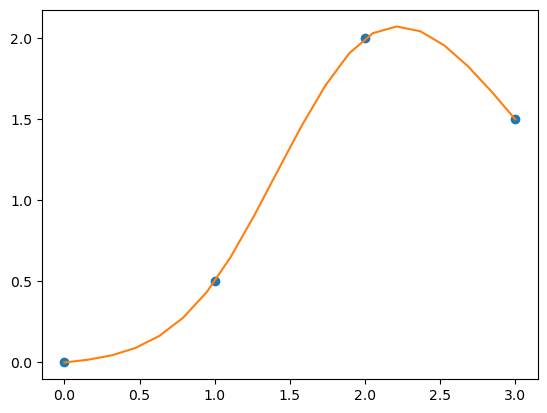

In [409]:
import matplotlib.pyplot as plt
import numpy as np

x_plot=np.linspace(0,3,20)

plt.plot(x,y,"o")
plt.plot(x_plot,[cs(xi) for xi in x_plot]);